## Read in Data 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category = FutureWarning)
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Cleaning continuous variables 

### Filling missing values for Age 

In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace = True)

In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Combining SibSp and Parch 

<Figure size 432x288 with 0 Axes>

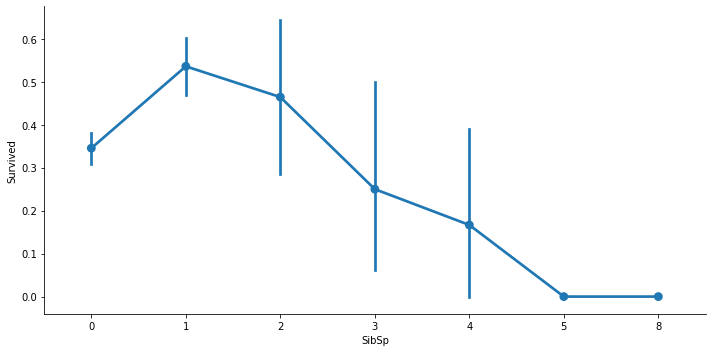

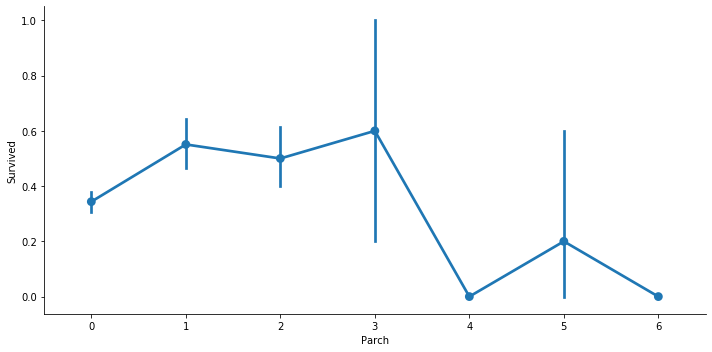

In [6]:
for i,col in enumerate(['SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x = col, y = 'Survived', data = titanic, kind = 'point', aspect = 2,)

In [7]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Dropping unnecessary variables 

In [8]:
titanic.drop(['PassengerId','SibSp','Parch'],axis = 1, inplace = True)

In [9]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


## Cleaning categorical features 

### Creating indicator for cabin 

In [10]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(),0,1)

In [11]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


### Converting sex to numeric 

In [12]:
gender = {'male':0, 'female':1}
titanic['Sex'] = titanic['Sex'].map(gender)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,S,0,0


### Dropping unnecessary variables 

In [13]:
titanic.drop(['Ticket','Cabin','Name','Embarked'],axis = 1, inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


## Split into train, validation and test set 

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
features = titanic.drop('Survived',axis = 1)
labels = titanic['Survived']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [17]:
for dataset in [y_train,y_val,y_test]:
    print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


## Fitting and evaluating model using 5-fold cross validation 

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [19]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv = 5) # .values.ravel() converts column vector to an array

In [20]:
scores

array([0.81308411, 0.82242991, 0.79439252, 0.80373832, 0.81132075])

## Hyperparameter Tuning 

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std * 2,3),params))

In [23]:
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf, parameters, cv = 5)
cv.fit(X_train,y_train.values.ravel())

print_results(cv)


BEST PARAMS: {'max_depth': 10, 'n_estimators': 50}

0.777 (+/-0.071) for {'max_depth': 2, 'n_estimators': 5}
0.792 (+/-0.13) for {'max_depth': 2, 'n_estimators': 50}
0.802 (+/-0.115) for {'max_depth': 2, 'n_estimators': 100}
0.822 (+/-0.077) for {'max_depth': 10, 'n_estimators': 5}
0.828 (+/-0.057) for {'max_depth': 10, 'n_estimators': 50}
0.82 (+/-0.046) for {'max_depth': 10, 'n_estimators': 100}
0.792 (+/-0.081) for {'max_depth': 20, 'n_estimators': 5}
0.811 (+/-0.029) for {'max_depth': 20, 'n_estimators': 50}
0.807 (+/-0.018) for {'max_depth': 20, 'n_estimators': 100}
0.803 (+/-0.049) for {'max_depth': None, 'n_estimators': 5}
0.818 (+/-0.035) for {'max_depth': None, 'n_estimators': 50}
0.809 (+/-0.019) for {'max_depth': None, 'n_estimators': 100}


### Fitting best models on full training set

The 3 best models have to be refit to the full training set as the models were fit on only 80% of training data due to 5-fold cross validation. Each loop uses only 80% of data for training and the remaning 20% for testing.

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [25]:
rf1 = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rf1.fit(X_train, y_train)

rf2 = RandomForestClassifier(n_estimators = 50, max_depth = 10)
rf2.fit(X_train, y_train)

rf3 = RandomForestClassifier(n_estimators = 50, max_depth = None)
rf3.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Evaluate model on validation set 

In [26]:
for mdl in [rf1,rf2,rf3]:
    y_pred = mdl.predict(X_val)
    accuracy = round(accuracy_score(y_val,y_pred),3)
    precision = round(precision_score(y_val,y_pred),3)
    recall = round(recall_score(y_val,y_pred),3)
    
    print('MAX DEPTH: {} / # OF EST: {} -- A:{} / P:{} / R:{}'.format (mdl.max_depth,
                                                                      mdl.n_estimators,
                                                                      accuracy,
                                                                      precision,
                                                                      recall))

MAX DEPTH: 10 / # OF EST: 100 -- A:0.832 / P:0.859 / R:0.724
MAX DEPTH: 10 / # OF EST: 50 -- A:0.821 / P:0.814 / R:0.75
MAX DEPTH: None / # OF EST: 50 -- A:0.804 / P:0.789 / R:0.737


## Evaluate best model on test set 

In [27]:
y_pred = rf1.predict(X_test)
accuracy = round(accuracy_score(y_test,y_pred),3)
precision = round(precision_score(y_test,y_pred),3)
recall = round(recall_score(y_test,y_pred),3)
    
print('MAX DEPTH: {} / # OF EST: {} -- A:{} / P:{} / R:{}'.format (rf1.max_depth,
                                                                   rf1.n_estimators,
                                                                   accuracy,
                                                                   precision,
                                                                   recall))
print('The model can predict survival of {} % of the passengers.'.format(accuracy*100))

MAX DEPTH: 10 / # OF EST: 100 -- A:0.798 / P:0.764 / R:0.646
The model can predict survival of 79.80000000000001 % of the passengers.


For the same hyperparameter values, the accuracy obtained from GridSearchCV, validation and test set varies.